In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [57]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers= centers, cluster_std = 0.4)
#print(X)
#print(y)

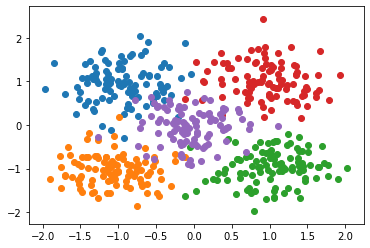

In [58]:
plt.scatter(X[y == 0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.scatter(X[y==3,0], X[y==3,1])
plt.scatter(X[y==4,0], X[y==4,1])

In [59]:
print (y)
# We are one hot coding the values in y, replacing the 0,1,2 with the hot coding to categorize our data in the future
y_cat = to_categorical(y,5)
print (y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [60]:
model = Sequential()
model.add(Dense(units=5, input_shape = (2,), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [64]:
history = model.fit(x = X, y=y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
500/500 [==============================] - 0s 24us/step - loss: 0.1528 - accuracy: 0.9520
Epoch 2/100
500/500 [==============================] - 0s 26us/step - loss: 0.1509 - accuracy: 0.9480
Epoch 3/100
500/500 [==============================] - 0s 24us/step - loss: 0.1535 - accuracy: 0.9500
Epoch 4/100
500/500 [==============================] - 0s 24us/step - loss: 0.1530 - accuracy: 0.9520
Epoch 5/100
500/500 [==============================] - 0s 20us/step - loss: 0.1517 - accuracy: 0.9480
Epoch 6/100
500/500 [==============================] - 0s 22us/step - loss: 0.1551 - accuracy: 0.9440
Epoch 7/100
500/500 [==============================] - 0s 22us/step - loss: 0.1502 - accuracy: 0.9480
Epoch 8/100
500/500 [==============================] - 0s 22us/step - loss: 0.1508 - accuracy: 0.9520
Epoch 9/100
500/500 [==============================] - 0s 22us/step - loss: 0.1522 - accuracy: 0.9500
Epoch 10/100
500/500 [==============================] - 0s 22us/step - loss: 0.151

In [62]:
def plot_decision_boundary (X,y_cat,model):
    x_span = np.linspace(min(X[:,0]) -1, max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1]) -1, max(X[:,1])+1,50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_ , yy_ = xx.ravel(), yy.ravel()
    print(xx_)
    print(yy_)
    grid = np.c_[xx_,yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]
0.2
Prediction is [4]


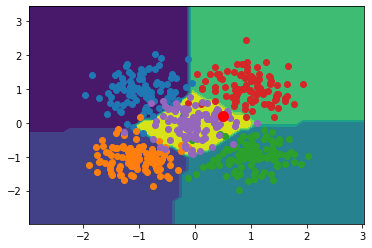

In [63]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y == 0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.scatter(X[y==3,0], X[y==3,1])
plt.scatter(X[y==4,0], X[y==4,1])
point = np.array([[0.5,0.2]])
prediction = model.predict_classes(point)
print (point[0,1])
plt.plot([point[0,0]], [point[0,1]],marker='o', markersize = 10, color = 'r')
print ('Prediction is', prediction)